# Advanced radiation and remote sensing


Manfred Brath, Oliver Lemke

## Exercise 2: line shape

In [1]:
%matplotlib widget


import os
# Uncomment and adjust the following lines
# if ARTS_DATA_PATH is not set as environment variable
os.environ["ARTS_DATA_PATH"] = "/Users/wgblumbe/Code/rttools/arts_catalogs/arts-cat-data-snapshot-arts-2.5.8/"

import matplotlib.pyplot as plt
import numpy as np
import typhon as ty
from lineshape_module import tag2tex, calculate_absxsec, linewidth

# make plot folder, if it is not existing
os.makedirs("plots", exist_ok=True)

cache = None  

The `calculate_absxsec` function calculates absorption cross sections and uses several keyword arguments as inputs, among other lineshape and normalization, see also the function definition in `absorption_module.py` or the contextual help. Please use "VP" (Voigt-Function) as line shape and "VVH"  (van Vleck-Huber) as normalization.

### 1) Absorption cross section and coefficient
Choose an individual line of for example water vapor and perform calculations over a restricted frequency range for a number of different pressures. Keep the temperature constant.

* How does the shape of the spectral lines change?

By now we investigated absorption in terms of the absorption cross-section
$\sigma$. Another widely used unit is the absorption coeffiction
$\alpha$. It takes the number concentration $n$ of the absorber
into account:
$$ \alpha=n\cdot\sigma $$

* How does the absorption coefficient in the line centre change, if pressure is changed?


In [4]:
# Define parameters
species = "H2O, H2O-SelfContCKDMT400"
temperature = 300
pressure = 101325


#"H2O, H2O-SelfContCKDMT400, H2O-ForeignContCKDMT400","CO2, CO2-CKDMT252","O3", "N2O", "CH4"
# Call ARTS to calculate absorption cross sections
freq, abs_xsec, cache = calculate_absxsec(species, pressure, temperature, vmr=.01, lines_off=1)

RuntimeError: User Error:
Error is found at:
	/Users/olemke/mambaforge/envs/py310/conda-bld/pyarts_1669991941295/work/src/predefined/predef_data.h:59
Please follow these instructions to correct your error:
Cannot find data for continua with error: User Error: data.find(T::key) == data.end()
Error is found at:
	/Users/olemke/mambaforge/envs/py310/conda-bld/pyarts_1669991941295/work/src/predefined/predef_data.h:54
Please follow these instructions to correct your error:
No data

In [8]:
#abs_lines = cache.ArrayOfAbsorptionLinesSet()
#abs_lines = cache.abs_lines.value
#print(abs_lines)

TypeError: ArrayOfAbsorptionLinesSet(): incompatible function arguments. The following argument types are supported:
    1. (self: pyarts.arts.Pyarts::Workspace, out: Union[pyarts.arts.WorkspaceVariable, pyarts.arts.ArrayOfAbsorptionLines], value: Union[pyarts.arts.WorkspaceVariable, pyarts.arts.ArrayOfAbsorptionLines], verbosity: Optional[Union[pyarts.arts.WorkspaceVariable, pyarts.arts.Verbosity]] = ws.verbosity) -> None

Invoked with: Workspace

Text(0.5, 1.0, 'H$_{2}$O p:1013.25 hPa T:300 K')

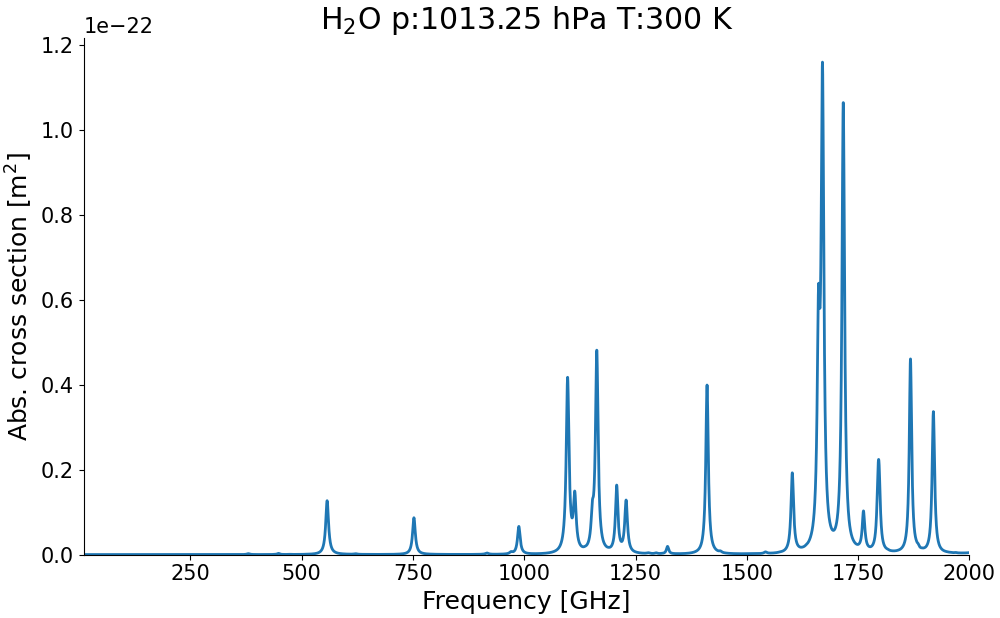

In [9]:
# example plotting code

plt.style.use(ty.plots.styles("typhon"))

fig, ax = plt.subplots()
ax.plot(freq / 1e9, abs_xsec)
ax.set_xlim(freq.min() / 1e9, freq.max() / 1e9)
ax.set_ylim(bottom=0)
ax.set_xlabel("Frequency [GHz]")
ax.set_ylabel(r"Abs. cross section [$\sf m^2$]")
ax.set_title(f"{tag2tex(species)} p:{pressure/100} hPa T:{temperature:0.0f} K")

#uncomment to save the figure
# fig.savefig(  # Save figure.
#     f"plots/plot_xsec_{species}_{pressure:.0f}Pa_{temperature:.0f}K.pdf"
# )

### 2) Linewidth
The full-width at half maximum (FWHM) is a measure of the line width. Use the function `linewidth()` to calculate the FWHM for a given absorption spectrum.

* Make a plot of this as a function of altitude (pressure) for a microwave line and an infrared absorption line.
